In [1]:
# Importing dependencies
import requests
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# File to Load (Remember to Change These)
crime_data_2020 = "Data/Crime_Incidents_in_2020.csv"
crime_data_2021 = "Data/Crime_Incidents_in_2021.csv"

In [3]:
# Read School and Student Data File and store into Pandas Data Frames
crime_data_2020 = pd.read_csv(crime_data_2020)
crime_data_2021 = pd.read_csv(crime_data_2021)

In [4]:
# Convert Dataset into Dataframe 
crime_data_df = pd.DataFrame(crime_data_2020)
crime_data_df.head()

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,-77.044182,38.905654,11139598,2020/08/24 04:00:00+00,MIDNIGHT,OTHERS,HOMICIDE,1900 - 1999 BLOCK OF M STREET NW,396168.0,137533.0,...,010700 1,10700.0,Precinct 17,38.905646,-77.044180,GOLDEN TRIANGLE,2011/09/23 06:40:00+00,NaN,570698887,NaN
1,-76.972651,38.857491,10251445,2020/09/11 04:00:00+00,MIDNIGHT,GUN,HOMICIDE,2300 - 2399 BLOCK OF AINGER PLACE SE,402374.0,132186.0,...,007502 1,7502.0,Precinct 134,38.857483,-76.972648,NaN,2010/09/02 04:00:00+00,2010/09/02 04:00:00+00,570698997,NaN
2,-77.030788,38.911874,16641,2020/01/28 05:14:39+00,MIDNIGHT,OTHERS,THEFT F/AUTO,1300 - 1399 BLOCK OF CORCORAN STREET NW,397330.0,138223.0,...,005001 2,5001.0,Precinct 16,38.911866,-77.030785,NaN,2020/01/28 05:14:58+00,2020/01/28 05:15:02+00,570699000,NaN
3,-76.972226,38.854086,10147537,2020/12/21 05:00:00+00,MIDNIGHT,OTHERS,HOMICIDE,2300 - 2499 BLOCK OF HARTFORD STREET SE,402411.0,131808.0,...,007408 2,7408.0,Precinct 115,38.854078,-76.972223,NaN,2010/10/10 02:00:00+00,NaN,570699004,NaN
4,-77.001753,38.821632,18048023,2020/10/21 04:00:00+00,MIDNIGHT,OTHERS,HOMICIDE,4600 - 4799 BLOCK OF SOUTH CAPITOL STREET,399848.0,128205.0,...,009811 1,9811.0,Precinct 125,38.821624,-77.001750,NaN,2018/03/26 08:40:06+00,2018/03/26 10:04:44+00,570700076,NaN


In [5]:
# Convert Dataset into Dataframe
crime_data_df2 = pd.DataFrame(crime_data_2021)
crime_data_df2.head()

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,-77.034107,38.902522,15003190,2021/10/21 04:08:27+00,MIDNIGHT,OTHERS,THEFT F/AUTO,1434 - 1499 BLOCK OF K STREET NW,397041.7,137184.93,...,010100 1,10100.0,Precinct 129,38.902514,-77.034105,DOWNTOWN,2021/10/21 00:40:00+00,2021/10/21 02:00:00+00,570148262,NaN
1,-77.068637,38.932082,11048862,2021/10/13 21:24:42+00,EVENING,OTHERS,THEFT F/AUTO,3100 - 3199 BLOCK OF 35TH STREET NW,394049.0,140468.00,...,000600 3,600.0,Precinct 27,38.932074,-77.068635,NaN,2021/10/13 14:00:00+00,2021/10/13 15:15:00+00,570148266,NaN
2,-76.985601,38.912526,12113231,2021/08/12 12:00:17+00,DAY,OTHERS,THEFT/OTHER,1800 - 1899 BLOCK OF CENTRAL PLACE NE,401249.0,138295.00,...,008803 1,8803.0,Precinct 76,38.912518,-76.985599,NaN,2021/08/11 14:30:00+00,2021/08/12 04:00:00+00,570148270,NaN
3,-76.989349,38.905932,11124202,2021/09/01 12:39:59+00,DAY,OTHERS,THEFT/OTHER,1100 - 1199 BLOCK OF OATES STREET NE,400924.0,137563.00,...,008802 3,8802.0,Precinct 77,38.905924,-76.989347,NaN,2021/09/01 01:36:00+00,NaN,570148273,NaN
4,-76.975322,38.896552,21182177,2021/12/14 17:04:14+00,DAY,OTHERS,THEFT/OTHER,2000 - 2099 BLOCK OF ROSEDALE STREET NE,402141.0,136522.00,...,007903 1,7903.0,Precinct 80,38.896544,-76.975319,NaN,2021/12/09 13:00:00+00,2021/12/10 02:00:00+00,570172669,NaN


In [6]:
# Group by 'Offense' and 'Shift' to get counts of crime incidents per shift for 2020
crime_data_offense = crime_data_2020.groupby(['OFFENSE', 'SHIFT']).count()
crime_data_offense.head()

X    Y  CCN  REPORT_DAT  METHOD  BLOCK  \
OFFENSE                    SHIFT                                                
ARSON                      DAY         4    4    4           4       4      4   
                           EVENING     7    7    7           7       7      7   
                           MIDNIGHT    2    2    2           2       2      2   
ASSAULT W/DANGEROUS WEAPON DAY       318  318  318         318     318    318   
                           EVENING   661  661  661         661     661    661   

                                     XBLOCK  YBLOCK  WARD  ANC  ...  \
OFFENSE                    SHIFT                                ...   
ARSON                      DAY            4       4     4    4  ...   
                           EVENING        7       7     7    7  ...   
                           MIDNIGHT       2       2     2    2  ...   
ASSAULT W/DANGEROUS WEAPON DAY          318     318   318  318  ...   
                           EVENING      661     661   661  661  ...   

                                     BLOCK_GROUP  CENSUS_TRACT  \
OFFENSE                    SHIFT                                 
ARSON                      DAY                 4             4   
                           EVENING             7             7   
                           MIDNIGHT            2             2   
ASSAULT W/DANGEROUS WEAPON DAY               318           318   
                           EVENING           661           661   

                                     VOTING_PRECINCT  LATITUDE  LONGITUDE  \
OFFENSE                    SHIFT                                            
ARSON                      DAY                     4         4          4   
                           EVENING                 7         7          7   
                           MIDNIGHT                2         2          2   
ASSAULT W/DANGEROUS WEAPON DAY                   318       318        318   
                           EVENING               661       661        661   

                                     BID  START_DATE  END_DATE  OBJECTID  \
OFFENSE                    SHIFT                                           
ARSON                      DAY         2           4         4         4   
                           EVENING     1           7         7         7   
                           MIDNIGHT    1           2         1         2   
ASSAULT W/DANGEROUS WEAPON DAY        36         318       209       318   
                           EVENING    72         661       489       661   

                                     OCTO_RECORD_ID  
OFFENSE                    SHIFT                     
ARSON                      DAY                    0  
                           EVENING                0  
                           MIDNIGHT               0  
ASSAULT W/DANGEROUS WEAPON DAY                    0  
                           EVENING                0  

[5 rows x 23 columns]

In [7]:
# Group by 'Offense' and 'Shift' to get counts of crime incidents per shift for 2021
crime_data_offense2 = crime_data_2021.groupby(['OFFENSE', 'SHIFT']).count()
crime_data_offense2.head()

X    Y  CCN  REPORT_DAT  METHOD  BLOCK  \
OFFENSE                    SHIFT                                                
ARSON                      DAY         2    2    2           2       2      2   
                           EVENING     1    1    1           1       1      1   
                           MIDNIGHT    1    1    1           1       1      1   
ASSAULT W/DANGEROUS WEAPON DAY       321  321  321         321     321    321   
                           EVENING   685  685  685         685     685    685   

                                     XBLOCK  YBLOCK  WARD  ANC  ...  \
OFFENSE                    SHIFT                                ...   
ARSON                      DAY            2       2     2    2  ...   
                           EVENING        1       1     1    1  ...   
                           MIDNIGHT       1       1     1    1  ...   
ASSAULT W/DANGEROUS WEAPON DAY          321     321   321  321  ...   
                           EVENING      685     685   684  685  ...   

                                     BLOCK_GROUP  CENSUS_TRACT  \
OFFENSE                    SHIFT                                 
ARSON                      DAY                 2             2   
                           EVENING             1             1   
                           MIDNIGHT            1             1   
ASSAULT W/DANGEROUS WEAPON DAY               320           320   
                           EVENING           684           684   

                                     VOTING_PRECINCT  LATITUDE  LONGITUDE  \
OFFENSE                    SHIFT                                            
ARSON                      DAY                     2         2          2   
                           EVENING                 1         1          1   
                           MIDNIGHT                1         1          1   
ASSAULT W/DANGEROUS WEAPON DAY                   321       321        321   
                           EVENING               685       685        685   

                                     BID  START_DATE  END_DATE  OBJECTID  \
OFFENSE                    SHIFT                                           
ARSON                      DAY         0           2         2         2   
                           EVENING     0           1         0         1   
                           MIDNIGHT    0           1         1         1   
ASSAULT W/DANGEROUS WEAPON DAY        33         321       241       321   
                           EVENING    79         685       536       685   

                                     OCTO_RECORD_ID  
OFFENSE                    SHIFT                     
ARSON                      DAY                    0  
                           EVENING                0  
                           MIDNIGHT               0  
ASSAULT W/DANGEROUS WEAPON DAY                    0  
                           EVENING                0  

[5 rows x 23 columns]

In [8]:
# Selecting only DAY Shifts of Crimes for 2020
crime_data_day = crime_data_df.loc[crime_data_df['SHIFT'] == 'DAY']
crime_data_day.head()

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
5,-76.934386,38.910671,20091820,2020/06/23 15:57:48+00,DAY,OTHERS,MOTOR VEHICLE THEFT,4600 - 4699 BLOCK OF QUARLES STREET NE,405691.0,138091.0,...,009601 1,9601.0,Precinct 92,38.910663,-76.934383,NaN,2020/06/18 13:00:12+00,2020/06/22 14:00:15+00,570722713,NaN
7,-76.972226,38.854086,20092284,2020/06/24 13:20:50+00,DAY,OTHERS,THEFT F/AUTO,2300 - 2499 BLOCK OF HARTFORD STREET SE,402411.0,131808.0,...,007408 2,7408.0,Precinct 115,38.854078,-76.972223,NaN,2020/06/24 12:15:08+00,NaN,570722715,NaN
11,-77.065585,38.911643,20094577,2020/06/29 13:35:22+00,DAY,OTHERS,BURGLARY,1600 - 1677 BLOCK OF WISCONSIN AVENUE NW,394312.0,138199.0,...,000102 1,102.0,Precinct 5,38.911636,-77.065583,GEORGETOWN,2020/06/28 23:00:50+00,2020/06/29 08:45:44+00,570722719,NaN
14,-77.072700,38.935079,20038181,2020/03/03 15:24:17+00,DAY,OTHERS,THEFT/OTHER,3400 - 3421 BLOCK OF WISCONSIN AVENUE NW,393697.0,140801.0,...,001002 4,1002.0,Precinct 29,38.935071,-77.072698,NaN,2020/03/03 14:15:09+00,2020/03/03 14:29:53+00,570722783,NaN
15,-76.973989,38.851033,20038263,2020/03/03 18:12:57+00,DAY,OTHERS,THEFT/OTHER,2200 - 2209 BLOCK OF ALABAMA AVENUE SE,402258.0,131469.0,...,007403 2,7403.0,Precinct 116,38.851025,-76.973987,NaN,2020/03/03 17:16:09+00,NaN,570722784,NaN


In [9]:
# Selecting EVENING Shifts for Crimes of 2020
crime_data_evening = crime_data_df.loc[crime_data_df['SHIFT'] == 'EVENING']
crime_data_evening = crime_data_evening.groupby(['OFFENSE']).count()
crime_data_evening_cleaned = crime_data_evening[['SHIFT']]
crime_data_evening_cleaned = crime_data_evening_cleaned.rename(columns={"SHIFT": "Count"})
crime_data_evening_cleaned

,Count
OFFENSE,
ARSON,7
ASSAULT W/DANGEROUS WEAPON,661
BURGLARY,349
MOTOR VEHICLE THEFT,1482
ROBBERY,770
SEX ABUSE,66
THEFT F/AUTO,3490
THEFT/OTHER,5499


In [10]:
# Selecting MIDNIGHT Shifts for Crimes of 2020
crime_data_midnight = crime_data_df.loc[crime_data_df['SHIFT'] == 'MIDNIGHT']
crime_data_midnight.head()

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,-77.044182,38.905654,11139598,2020/08/24 04:00:00+00,MIDNIGHT,OTHERS,HOMICIDE,1900 - 1999 BLOCK OF M STREET NW,396168.0,137533.0,...,010700 1,10700.0,Precinct 17,38.905646,-77.044180,GOLDEN TRIANGLE,2011/09/23 06:40:00+00,NaN,570698887,NaN
1,-76.972651,38.857491,10251445,2020/09/11 04:00:00+00,MIDNIGHT,GUN,HOMICIDE,2300 - 2399 BLOCK OF AINGER PLACE SE,402374.0,132186.0,...,007502 1,7502.0,Precinct 134,38.857483,-76.972648,NaN,2010/09/02 04:00:00+00,2010/09/02 04:00:00+00,570698997,NaN
2,-77.030788,38.911874,16641,2020/01/28 05:14:39+00,MIDNIGHT,OTHERS,THEFT F/AUTO,1300 - 1399 BLOCK OF CORCORAN STREET NW,397330.0,138223.0,...,005001 2,5001.0,Precinct 16,38.911866,-77.030785,NaN,2020/01/28 05:14:58+00,2020/01/28 05:15:02+00,570699000,NaN
3,-76.972226,38.854086,10147537,2020/12/21 05:00:00+00,MIDNIGHT,OTHERS,HOMICIDE,2300 - 2499 BLOCK OF HARTFORD STREET SE,402411.0,131808.0,...,007408 2,7408.0,Precinct 115,38.854078,-76.972223,NaN,2010/10/10 02:00:00+00,NaN,570699004,NaN
4,-77.001753,38.821632,18048023,2020/10/21 04:00:00+00,MIDNIGHT,OTHERS,HOMICIDE,4600 - 4799 BLOCK OF SOUTH CAPITOL STREET,399848.0,128205.0,...,009811 1,9811.0,Precinct 125,38.821624,-77.001750,NaN,2018/03/26 08:40:06+00,2018/03/26 10:04:44+00,570700076,NaN


In [11]:
# Selecting DAY Shifts for Crimes of 2021
crime_data_day2 = crime_data_df2.loc[crime_data_df2['SHIFT'] == 'DAY']
crime_data_day2.head()

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
2,-76.985601,38.912526,12113231,2021/08/12 12:00:17+00,DAY,OTHERS,THEFT/OTHER,1800 - 1899 BLOCK OF CENTRAL PLACE NE,401249.0,138295.0,...,008803 1,8803.0,Precinct 76,38.912518,-76.985599,NaN,2021/08/11 14:30:00+00,2021/08/12 04:00:00+00,570148270,NaN
3,-76.989349,38.905932,11124202,2021/09/01 12:39:59+00,DAY,OTHERS,THEFT/OTHER,1100 - 1199 BLOCK OF OATES STREET NE,400924.0,137563.0,...,008802 3,8802.0,Precinct 77,38.905924,-76.989347,NaN,2021/09/01 01:36:00+00,NaN,570148273,NaN
4,-76.975322,38.896552,21182177,2021/12/14 17:04:14+00,DAY,OTHERS,THEFT/OTHER,2000 - 2099 BLOCK OF ROSEDALE STREET NE,402141.0,136522.0,...,007903 1,7903.0,Precinct 80,38.896544,-76.975319,NaN,2021/12/09 13:00:00+00,2021/12/10 02:00:00+00,570172669,NaN
5,-77.023542,38.931126,21182202,2021/12/14 17:32:22+00,DAY,OTHERS,THEFT F/AUTO,3291 - 3300 BLOCK OF GEORGIA AVENUE NW,397959.0,140360.0,...,003100 2,3100.0,Precinct 38,38.931119,-77.023539,NaN,2021/12/13 16:50:00+00,2021/12/13 17:00:00+00,570172670,NaN
9,-77.012636,38.956595,21182828,2021/12/15 18:31:23+00,DAY,GUN,ROBBERY,100 - 199 BLOCK OF KENNEDY STREET NW,398905.0,143187.0,...,002102 3,2102.0,Precinct 57,38.956587,-77.012633,NaN,2021/12/15 17:02:00+00,2021/12/15 17:03:00+00,570172674,NaN


In [12]:
# Selecting EVENING Shifts for Crimes of 2021
crime_data_evening2 = crime_data_df2.loc[crime_data_df2['SHIFT'] == 'EVENING']
crime_data_evening2 = crime_data_evening2.groupby(['OFFENSE']).count()
crime_data_evening2_cleaned = crime_data_evening2[['SHIFT']]
crime_data_evening2_cleaned = crime_data_evening2_cleaned.rename(columns={"SHIFT": "Count"})

In [13]:
# Selecting MIDNIGHT Shifts for Crimes of 2021
crime_data_midnight2 = crime_data_df2.loc[crime_data_df2['SHIFT'] == 'MIDNIGHT']
crime_data_midnight2 = crime_data_midnight2.groupby(['OFFENSE']).count()
crime_data_midnight2_cleaned = crime_data_midnight2[['SHIFT']]
crime_data_midnight2_cleaned = crime_data_midnight2_cleaned.rename(columns={"SHIFT": "Count"})

<Axes: xlabel='OFFENSE'>

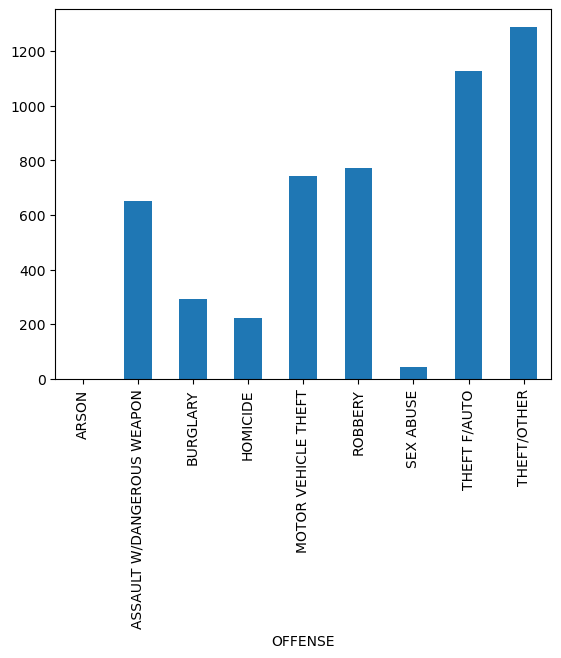

In [14]:
# Plot Crime data for day 2020
crime_data_midnight2_cleaned.plot(kind = 'bar', legend = False, rot = 90)

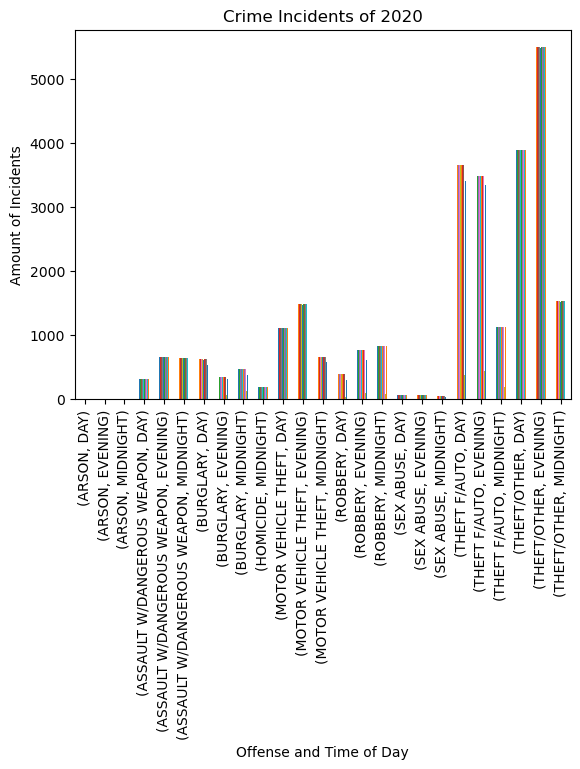

In [15]:
# Plot Crime Incidents 2020 data   #### Maybe some more cleanup to be done for easier legibility
crime_data_offense.plot(kind= "bar", legend=False, rot= 90)

plt.title('Crime Incidents of 2020')
plt.xlabel('Offense and Time of Day')
plt.ylabel('Amount of Incidents')

# Display plot
plt.show()

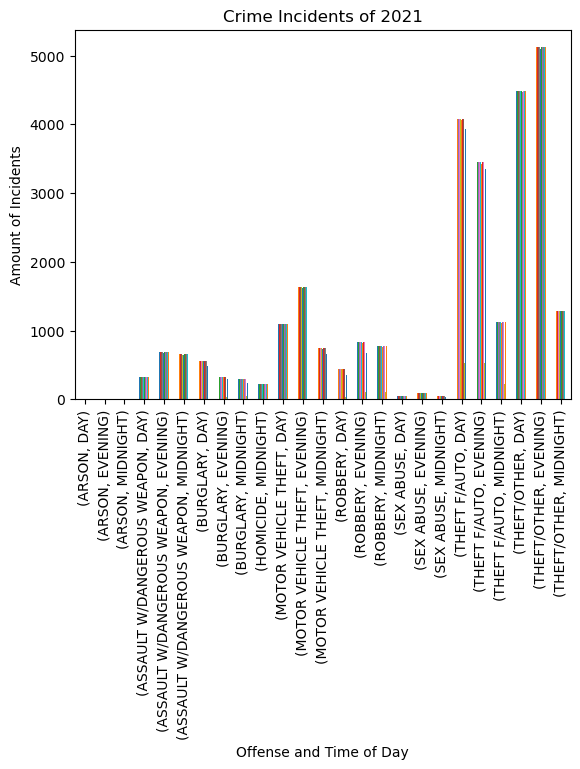

In [16]:
# Plot Crime Incidents 2021 data   #### Also maybe some more cleanup
crime_data_offense2.plot(kind= "bar", legend=False, rot= 90)

plt.title('Crime Incidents of 2021')
plt.xlabel('Offense and Time of Day')
plt.ylabel('Amount of Incidents')

# Display plot
plt.show()

### Use Seaborn to plot the plots

In [17]:
# Importing new Python library for plots
import seaborn as sns
sns.set_theme('notebook')
sns.set_style("ticks")
sns.set_context("talk")

In [18]:
# Creating Dataframe for Summarized crime data for 2020
crime_2020_summarized = pd.read_csv("Data/2020_crimes_Summarized")
crime_2020_summarized.head()

,OFFENSE,SHIFT,WARD,Count
0,ARSON,DAY,2,2
1,ARSON,DAY,5,1
2,ARSON,DAY,8,1
3,ARSON,EVENING,1,1
4,ARSON,EVENING,2,1


In [19]:
# Creating Dataframe for year 2020 by Month
crime_2020_byMonth = pd.read_csv("Data/2020_crimes_byMonth")
crime_2020_byMonth.head()

,OFFENSE,SHIFT,START_DATE,Count
0,ARSON,DAY,2020-01,1
1,ARSON,DAY,2020-05,1
2,ARSON,DAY,2020-06,1
3,ARSON,DAY,2020-09,1
4,ARSON,EVENING,2020-01,1


In [20]:
# Creating Dataframe for Summarized crime data for 2021
crime_2021_summarized = pd.read_csv("Data/2021_crimes_Summarized")
crime_2021_summarized.head()

,OFFENSE,SHIFT,WARD,Count
0,ARSON,DAY,3.0,1
1,ARSON,DAY,8.0,1
2,ARSON,EVENING,2.0,1
3,ARSON,MIDNIGHT,7.0,1
4,ASSAULT W/DANGEROUS WEAPON,DAY,1.0,30


In [21]:
# Creating Dataframe for year 2021 by Month
crime_2021_byMonth = pd.read_csv("Data/2021_crimes_byMonth")
crime_2021_byMonth.head()

,OFFENSE,SHIFT,START_DATE,Count
0,ARSON,DAY,2021-05,1
1,ARSON,DAY,2021-06,1
2,ARSON,EVENING,2021-02,1
3,ARSON,MIDNIGHT,2021-01,1
4,ASSAULT W/DANGEROUS WEAPON,DAY,2020-09,1


In [22]:
# Clean up 2020 Dataframe to have Months as a single value
crime_2020_byMonth['START_DATE'].astype('datetime64[s]')
crime_2020_byMonth[['YEAR', 'MONTH']] = crime_2020_byMonth['START_DATE'].str.split('-', n = 1, expand = True)
crime_2020_byMonth = crime_2020_byMonth[['OFFENSE', 'SHIFT', 'MONTH' ,'Count']]
crime_2020_byMonth = crime_2020_byMonth.sort_values(by = 'MONTH', ascending = True)
crime_2020_byMonth.head()

,OFFENSE,SHIFT,MONTH,Count
0,ARSON,DAY,01,1
283,THEFT/OTHER,DAY,01,400
50,BURGLARY,DAY,01,50
62,BURGLARY,EVENING,01,37
263,THEFT F/AUTO,MIDNIGHT,01,216


In [23]:
# Clean up 2021 Dataframe to have Months as a single value
crime_2021_byMonth['START_DATE'].astype('datetime64[s]')
crime_2021_byMonth[['YEAR', 'MONTH']] = crime_2021_byMonth['START_DATE'].str.split('-', n = 1, expand = True)
crime_2021_byMonth = crime_2021_byMonth[['OFFENSE', 'SHIFT', 'MONTH' ,'Count']]
crime_2021_byMonth = crime_2021_byMonth.sort_values(by = 'MONTH', ascending = True)
crime_2021_byMonth.head()

,OFFENSE,SHIFT,MONTH,Count
124,MOTOR VEHICLE THEFT,EVENING,01,1
253,THEFT F/AUTO,EVENING,01,282
201,SEX ABUSE,EVENING,01,1
205,SEX ABUSE,EVENING,01,6
287,THEFT/OTHER,DAY,01,293


In [24]:
# Define how to aggregate various fields
agg_functions_months = {'MONTH': 'first', 'Count': 'sum', }

# Create new DataFrame by combining rows with same id values
months2020 = crime_2020_byMonth.groupby(crime_2020_byMonth['MONTH']).aggregate(agg_functions_months)

# Display the new data frame
months2020.head()

,MONTH,Count
MONTH,,
01,01,2969
02,02,2546
03,03,2224
04,04,1655
05,05,1888


In [25]:
# Create new DataFrame by combining rows with same id values
months2021 = crime_2021_byMonth.groupby(crime_2021_byMonth['MONTH']).aggregate(agg_functions_months)

# Display the new data frame
months2021.head()

,MONTH,Count
MONTH,,
01,01,2085
02,02,1736
03,03,1859
04,04,1875
05,05,2514


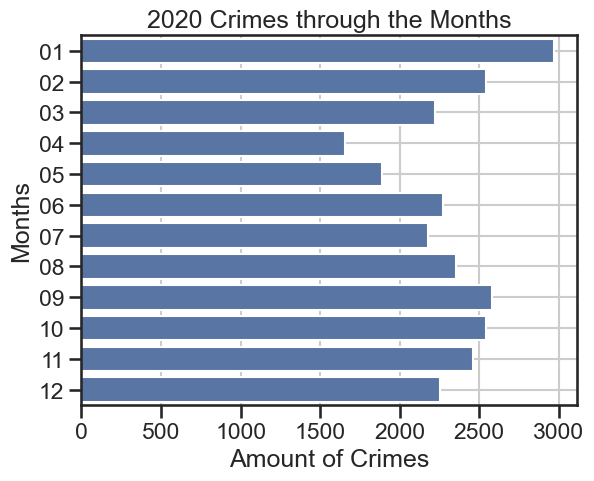

In [26]:
# Plot the graph 2020
sns.barplot(x = "Count", y = "MONTH", data = months2020)
plt.title('2020 Crimes through the Months')
plt.xlabel("Amount of Crimes")
plt.ylabel('Months')
plt.grid()

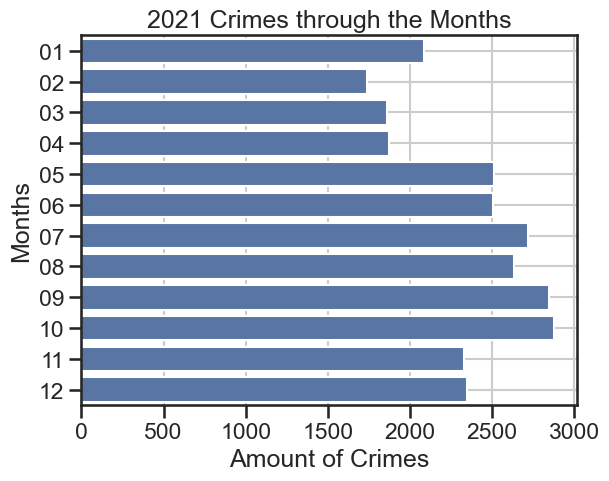

In [27]:
# Plot the graph for 2021
sns.barplot(x = "Count", y = "MONTH", data = months2021)
plt.title('2021 Crimes through the Months')
plt.xlabel("Amount of Crimes")
plt.ylabel('Months')
plt.grid()

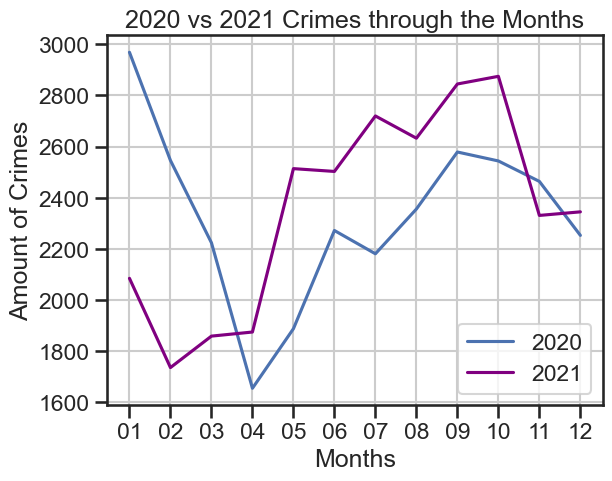

In [28]:
# Combine plots together
# Plot the graph 2020
sns.lineplot(x = "MONTH", y = "Count", data = months2020, label = '2020')

# Plot the graph for 2021
sns.lineplot(x = "MONTH", y = "Count", data = months2021, color = 'purple', label = '2021')
plt.title('2020 vs 2021 Crimes through the Months')
plt.xlabel('Months')
plt.ylabel('Amount of Crimes')
plt.grid()

### Clean up data summariezed for amount of Crimes per Ward

In [29]:
# Create and clean new dataframe for 2020
crime_ward2020 = crime_data_df[['OFFENSE', 'WARD', 'X']]
crime_ward2020 = pd.DataFrame(crime_ward2020)
crime_ward2020.head()

,OFFENSE,WARD,X
0,HOMICIDE,2,-77.044182
1,HOMICIDE,8,-76.972651
2,THEFT F/AUTO,2,-77.030788
3,HOMICIDE,8,-76.972226
4,HOMICIDE,8,-77.001753


In [30]:
# Create and clean new dataframe for 2021
crime_ward2021 = crime_data_df2[['OFFENSE', 'WARD', 'X']]
crime_ward2021 = pd.DataFrame(crime_ward2021)
crime_ward2021.head()

,OFFENSE,WARD,X
0,THEFT F/AUTO,2.0,-77.034107
1,THEFT F/AUTO,3.0,-77.068637
2,THEFT/OTHER,5.0,-76.985601
3,THEFT/OTHER,5.0,-76.989349
4,THEFT/OTHER,7.0,-76.975322


In [31]:
# Group by Ward, and Offense columns for 2021
crime_ward2021 = crime_ward2021.groupby(['WARD', 'OFFENSE']).count()

In [32]:
# Rename the count column properly for 2021
crime_ward2021 = crime_ward2021.rename(columns={'X': 'Count'})
crime_ward2021

Count
WARD OFFENSE                          
1.0  ASSAULT W/DANGEROUS WEAPON    162
     BURGLARY                      163
     HOMICIDE                       13
     MOTOR VEHICLE THEFT           501
     ROBBERY                       294
...                                ...
8.0  MOTOR VEHICLE THEFT           432
     ROBBERY                       340
     SEX ABUSE                      34
     THEFT F/AUTO                  587
     THEFT/OTHER                   851

[68 rows x 1 columns]

In [33]:
# Reset the index now after the rename function before for 2021
crime_ward2021 = crime_ward2021.reset_index()
crime_ward2021

,WARD,OFFENSE,Count
0,1.0,ASSAULT W/DANGEROUS WEAPON,162
1,1.0,BURGLARY,163
2,1.0,HOMICIDE,13
3,1.0,MOTOR VEHICLE THEFT,501
4,1.0,ROBBERY,294
...,...,...,...
63,8.0,MOTOR VEHICLE THEFT,432
64,8.0,ROBBERY,340
65,8.0,SEX ABUSE,34
66,8.0,THEFT F/AUTO,587


In [34]:
# Remove the decimal from the WARDS column
crime_ward2021[['WARD number', 'Decimal']] = crime_ward2021['WARD'].astype(str).str.split('.', n = 1, expand = True)
crime_ward2021 = crime_ward2021[['WARD number', 'OFFENSE', 'Count']]
crime_ward2021 = crime_ward2021.rename(columns={'WARD number': 'WARD'})
crime_ward2021.head()

,WARD,OFFENSE,Count
0,1,ASSAULT W/DANGEROUS WEAPON,162
1,1,BURGLARY,163
2,1,HOMICIDE,13
3,1,MOTOR VEHICLE THEFT,501
4,1,ROBBERY,294


In [35]:
# Group by Ward and Offense for 2020
crime_ward2020 = crime_ward2020.groupby(['WARD', 'OFFENSE']).count()
crime_ward2020.head()

X
WARD OFFENSE                        
1    ARSON                         1
     ASSAULT W/DANGEROUS WEAPON  139
     BURGLARY                    147
     HOMICIDE                     14
     MOTOR VEHICLE THEFT         401

In [36]:
# Rename the count column properly  for 2020
crime_ward2020 = crime_ward2020.rename(columns={'X': 'Count'})
crime_ward2020.head()

Count
WARD OFFENSE                          
1    ARSON                           1
     ASSAULT W/DANGEROUS WEAPON    139
     BURGLARY                      147
     HOMICIDE                       14
     MOTOR VEHICLE THEFT           401

In [37]:
# Reset the index now after the rename function before for  for 2020
crime_ward2020 = crime_ward2020.reset_index()
crime_ward2020.head()

,WARD,OFFENSE,Count
0,1,ARSON,1
1,1,ASSAULT W/DANGEROUS WEAPON,139
2,1,BURGLARY,147
3,1,HOMICIDE,14
4,1,MOTOR VEHICLE THEFT,401


In [38]:
# Define how to aggregate various fields
agg_functions_wards = {'OFFENSE' : 'first', 'Count': 'sum'}

# Create new DataFrame by combining rows with same id values
crime_ward2021 = crime_ward2021.groupby(crime_ward2021['WARD']).aggregate(agg_functions_wards)

# Display results
crime_ward2021.head()

,OFFENSE,Count
WARD,,
1,ASSAULT W/DANGEROUS WEAPON,4195
2,ARSON,5360
3,ARSON,1440
4,ASSAULT W/DANGEROUS WEAPON,2576
5,ASSAULT W/DANGEROUS WEAPON,4415


In [39]:
# Define how to aggregate various fields
agg_functions_wards = {'OFFENSE' : 'first', 'Count': 'sum'}

# Create new DataFrame by combining rows with same id values
crime_ward2020 = crime_ward2020.groupby(crime_ward2020['WARD']).aggregate(agg_functions_wards)

# Display results
crime_ward2020.head()

,OFFENSE,Count
WARD,,
1,ARSON,3542
2,ARSON,4685
3,ASSAULT W/DANGEROUS WEAPON,1709
4,ASSAULT W/DANGEROUS WEAPON,2703
5,ARSON,4394


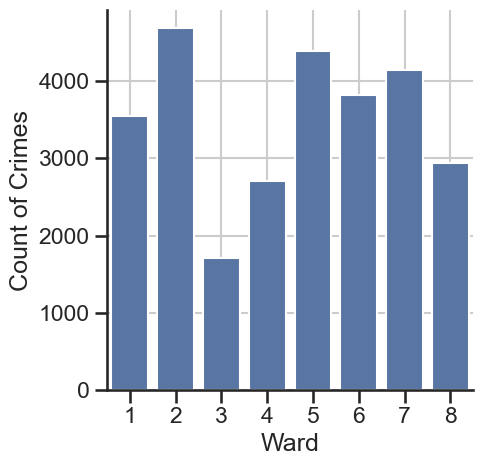

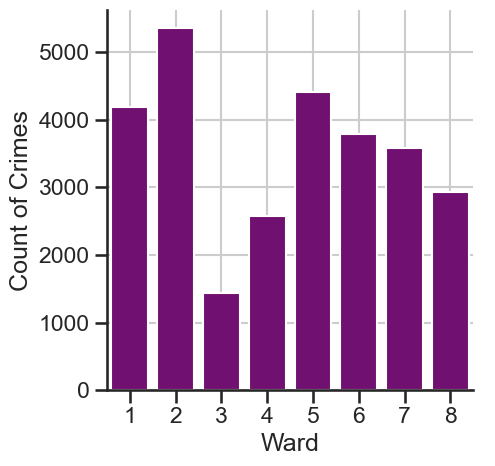

In [44]:
# Plot Ward Count 2020
sns.catplot(kind= 'bar', x = 'WARD', y = 'Count', data = crime_ward2020)
plt.xlabel('Ward')
plt.ylabel('Count of Crimes')
plt.grid()

# Plot Ward Count 2021
sns.catplot(kind= 'bar', x = 'WARD', y = 'Count', data = crime_ward2021, color= 'purple')
plt.xlabel('Ward')
plt.ylabel('Count of Crimes')
plt.grid()